<a href="https://colab.research.google.com/github/Pratham-Sri/Deep-Learning/blob/main/NN_mcls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test data sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Labels

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [ ]:
# show the training data
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

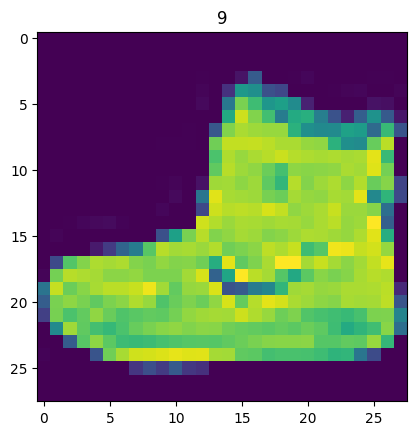

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.title(train_labels[0])
plt.show;

In [ ]:
# create a small list so we can index onto our class labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

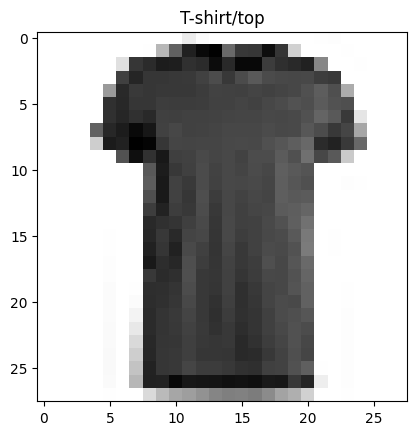

In [ ]:
# plot an example image and its labels
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
plt.show;

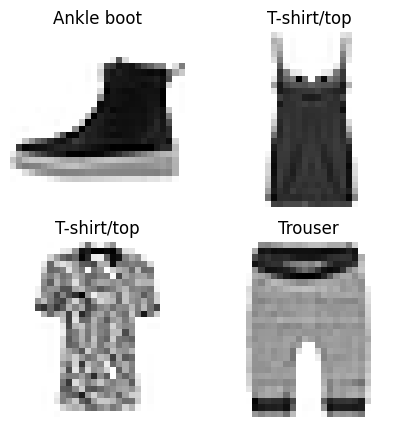

In [ ]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multi-class classification model

for our multi-class classification model, we can use a similar architecture to our binary classifiers, however we are going to tweak a few things:
* Input Shape = 28 X 28
* Output shape = 10 (one per class of clothing)
* loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = SOftmax(not sigmoid)

For one hot encoded labels use CategoricalCrossentropy, while using integral labels use SparseCategoricalCrossEntropy

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # our data needs to be flattened(from 28*28 to none,784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3564 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # our data needs to be flattened(from 28*28 to none,784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels, depth =10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3326 - accuracy: 0.1725 - val_loss: 1.7939 - val_accuracy: 0.2650
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6744 - accuracy: 0.2940 - val_loss: 1.5970 - val_accuracy: 0.3539
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5625 - accuracy: 0.3558 - val_loss: 1.5453 - val_accuracy: 0.3916
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3680 - accuracy: 0.4379 - val_loss: 1.3091 - val_accuracy: 0.4523
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2887 - accuracy: 0.4641 - val_loss: 1.2410 - val_accuracy: 0.4981
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1658 - accuracy: 0.5272 - val_loss: 1.1496 - val_accuracy: 0.5196
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1043 - accuracy: 0.5426 - val_loss: 1.1599 - val_accuracy:

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled(or normalized), this means they like to have numbers in the tensors ranging between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 and 1 by dviding by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# We can check the min and max values of the scaled training data
train_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # our data needs to be flattened(from 28*28 to none,784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1878 - accuracy: 0.6017 - val_loss: 0.8021 - val_accuracy: 0.7241
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6896 - accuracy: 0.7601 - val_loss: 0.6743 - val_accuracy: 0.7642
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6221 - accuracy: 0.7793 - val_loss: 0.6506 - val_accuracy: 0.7692
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5987 - accuracy: 0.7856 - val_loss: 0.6279 - val_accuracy: 0.7768
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5828 - accuracy: 0.7911 - val_loss: 0.6252 - val_accuracy: 0.7827
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5744 - accuracy: 0.7935 - val_loss: 0.6170 - val_accuracy: 0.7829
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5666 - accuracy: 0.7968 - val_loss: 0.6220 - val_accuracy:

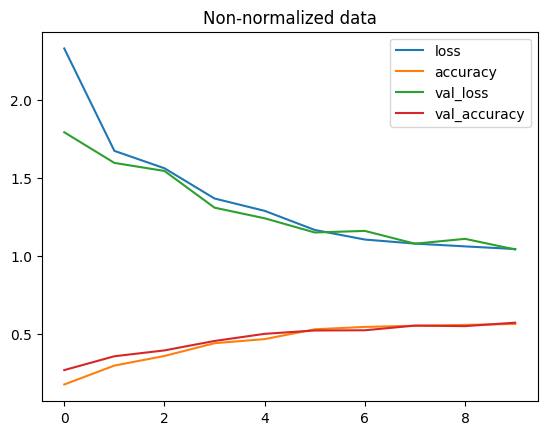

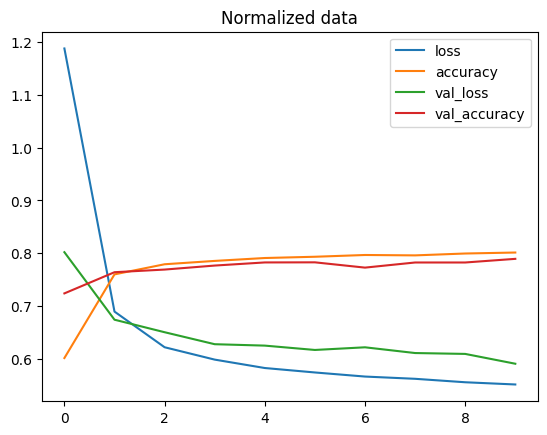

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_2.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(history_3.history).plot(title="Normalized data");

## FInding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # our data needs to be flattened(from 28*28 to none,784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_4.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

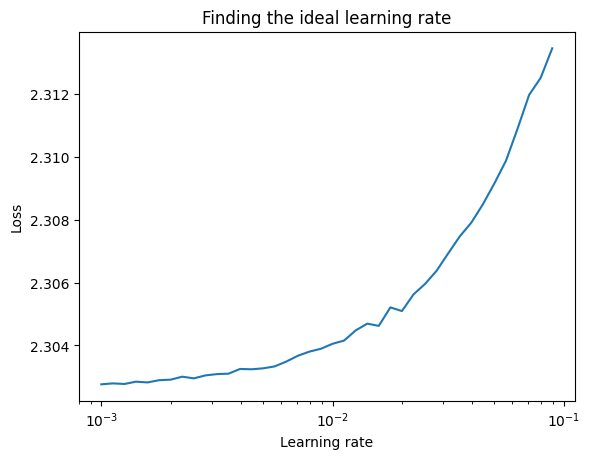

In [ ]:
# plot the learning rate decay
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # our data needs to be flattened(from 28*28 to none,784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2543 - accuracy: 0.4769 - val_loss: 0.9367 - val_accuracy: 0.6245
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8861 - accuracy: 0.6373 - val_loss: 0.8789 - val_accuracy: 0.6107
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8472 - accuracy: 0.6546 - val_loss: 0.8398 - val_accuracy: 0.6490
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8345 - accuracy: 0.6607 - val_loss: 0.8742 - val_accuracy: 0.6565
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8259 - accuracy: 0.6684 - val_loss: 0.8417 - val_accuracy: 0.6882
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8158 - accuracy: 0.6735 - val_loss: 0.8176 - val_accuracy: 0.6893
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8153 - accuracy: 0.6755 - val_loss: 0.8669 - val_accuracy:

## Evaluate a multi-class classification model
To evaluate we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions through visualizations.
* Improve its results (by training it for longer or changing the architecture)
* Save it or export it for use in an application

In [ ]:
from types import new_class
import itertools

figsize=(5,5)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(5,5),text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_preds))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  new_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(new_classes),
        yticks=np.arange(new_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [ ]:
# make some predictions for our model
y_probs = model_3.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.51497451e-11, 2.35316804e-27, 1.01873543e-09, 8.04239453e-11,
        2.66894070e-35, 5.58082126e-02, 8.80542445e-11, 7.92100057e-02,
        2.48833396e-03, 8.62493396e-01],
       [1.04105868e-03, 5.11631829e-15, 7.97151148e-01, 1.08023904e-07,
        1.43505335e-01, 2.84943636e-19, 5.83018847e-02, 4.53654772e-28,
        4.72136009e-07, 4.22104038e-25],
       [1.08527523e-02, 9.67507958e-01, 1.92677689e-05, 2.14552581e-02,
        2.31392028e-06, 1.03751029e-06, 1.28308006e-04, 3.31533920e-05,
        1.90081018e-08, 1.76478765e-09],
       [1.08527523e-02, 9.67507958e-01, 1.92677689e-05, 2.14552581e-02,
        2.31392028e-06, 1.03751029e-06, 1.28308006e-04, 3.31533920e-05,
        1.90081018e-08, 1.76478765e-09],
       [2.50556320e-01, 1.83005875e-04, 1.31980777e-01, 1.86983719e-01,
        1.04570463e-01, 3.80540610e-06, 3.24482530e-01, 1.18582593e-08,
        1.23942515e-03, 1.68393877e-09]], dtype=float32)

In [ ]:
y_probs[0],tf.argmax(y_probs[0])

(array([2.5149745e-11, 2.3531680e-27, 1.0187354e-09, 8.0423945e-11,
        2.6689407e-35, 5.5808213e-02, 8.8054244e-11, 7.9210006e-02,
        2.4883340e-03, 8.6249340e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [ ]:
# convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_preds)

array([[794,   3,  24, 129,  19,   1,  20,   0,  10,   0],
       [ 24, 928,   0,  45,   2,   0,   0,   0,   1,   0],
       [ 82,   0, 509,  28, 230,   0, 140,   1,  10,   0],
       [ 73,  23,   7, 836,  14,   5,  30,   7,   5,   0],
       [ 13,   0,  87,  76, 703,   2,  98,   0,  21,   0],
       [  0,   0,   0,  16,   0, 702,   0,  96,   6, 180],
       [248,   0, 112, 145, 327,   1, 147,   0,  20,   0],
       [  0,   0,   0,   5,   0,  22,   0, 874,   0,  99],
       [  1,   0,   6,  25,  47,  75,   7,   4, 833,   2],
       [  0,   0,   0,   0,   0,  11,   0,  48,   1, 940]])

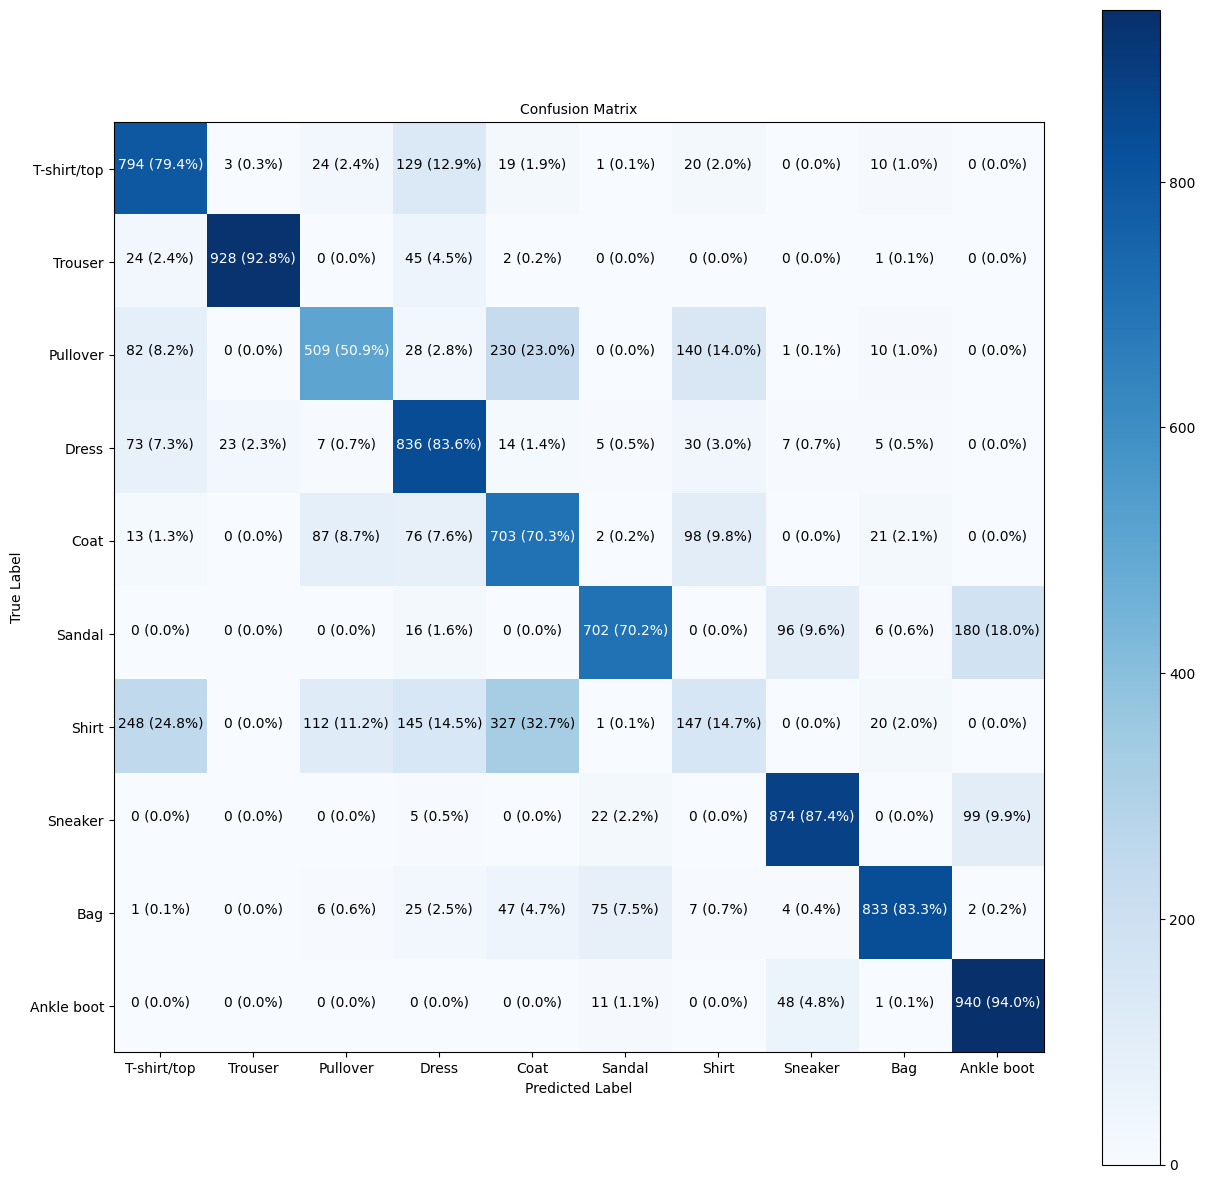

In [ ]:
# make a prettier confusion matrix
make_confusion_matrix(test_labels,y_preds,classes=class_names,figsize=(15,15),text_size=10)

In [ ]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # Set the color to green or red based on whether the prediction is right or wrong


1/1 [==============================] - 0s 25ms/step


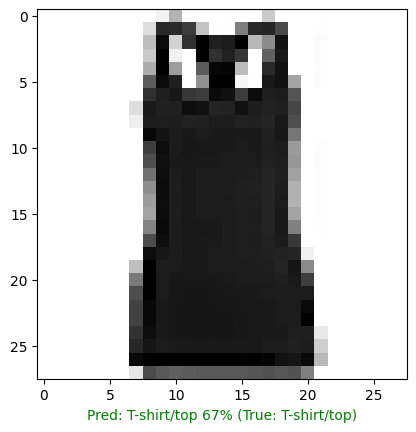

In [ ]:
# check out the random image as well as its predictions
plot_random_image(model_3, test_data_norm, test_labels, class_names)

## What patterns our model is learning

In [ ]:
# Find the layers of our most recent model
model_3.layers

In [ ]:
# Extract a particular layer
model_3.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_3.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[-1.5504183e+00, -5.2502213e+00,  1.2901254e-02,  3.1133741e-04],
        [ 3.7090850e+00, -9.7968922e+00,  2.8550185e-02,  8.6885840e-02],
        [-4.1410956e+00, -2.5089588e+00,  2.9359058e-02,  6.9008902e-02],
        ...,
        [-1.8227601e+00, -1.3463306e+00, -4.8128154e-02, -1.0430126e-01],
        [ 1.4027383e+00, -1.0148160e+00, -7.3438570e-02, -2.8597891e-02],
        [-1.4530960e+00, -1.0193913e-01,  5.5774868e-02,  6.9663018e-02]],
       dtype=float32),
 (784, 4))

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([14.024365  , 13.805218  , -0.06004391, -0.06921413], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros(atleast in the case of tensorflow dense layers).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

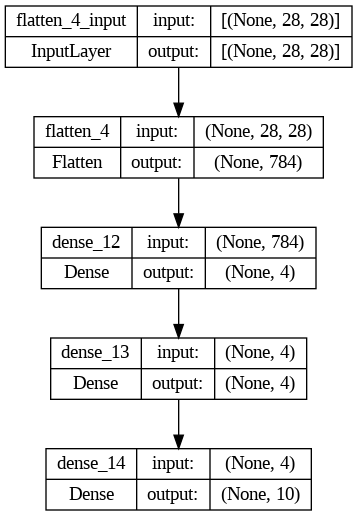

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3,show_shapes=True)